In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlp import load_images, load_labels  # 直接相对导入

TRAIN_IMG = "assets/MNIST/raw/train-images-idx3-ubyte"
TRAIN_LBL = "assets/MNIST/raw/train-labels-idx1-ubyte"
TEST_IMG  = "assets/MNIST/raw/t10k-images-idx3-ubyte"
TEST_LBL  = "assets/MNIST/raw/t10k-labels-idx1-ubyte"

X_train = load_images(TRAIN_IMG); y_train = load_labels(TRAIN_LBL)
X_test  = load_images(TEST_IMG);  y_test  = load_labels(TEST_LBL)

X_train.shape, X_test.shape


((60000, 784), (10000, 784))

In [10]:
def show(split="train", start=0, n=16):
    X, y = (X_train, y_train) if split == "train" else (X_test, y_test)
    rows = cols = int(np.ceil(np.sqrt(n)))
    plt.figure(figsize=(rows*2.2, cols*2.2))
    for i in range(n):
        idx = start + i
        if idx >= len(X): break
        plt.subplot(rows, cols, i + 1)
        plt.imshow(X[idx].reshape(28, 28), cmap="gray")
        plt.title(int(y[idx]), fontsize=10)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# === 展示相同类别的一排 ===
def show_digit_row(digit=0, split="train", n=10):
    X, y = (X_train, y_train) if split == "train" else (X_test, y_test)
    idxs = np.where(y == digit)[0][:n]
    plt.figure(figsize=(n*1.5, 2))
    for i, idx in enumerate(idxs):
        plt.subplot(1, n, i + 1)
        plt.imshow(X[idx].reshape(28, 28), cmap="gray")
        plt.axis("off")
    plt.suptitle(f"{split} digit={digit}", fontsize=14)
    plt.show()

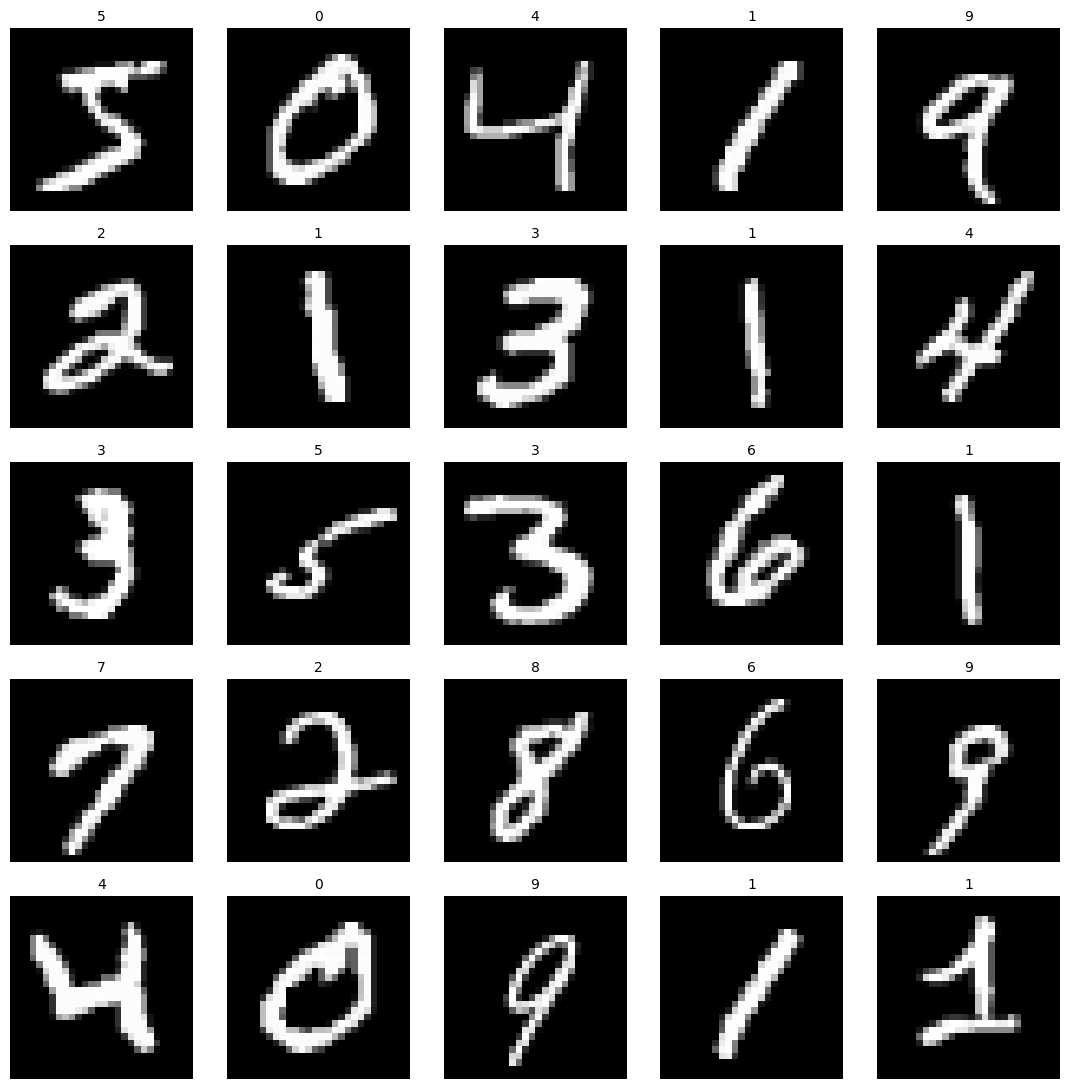

In [11]:
# === 使用示例 ===
show(split="train", start=0, n=25)   # 改 start / n 即可看不同样本

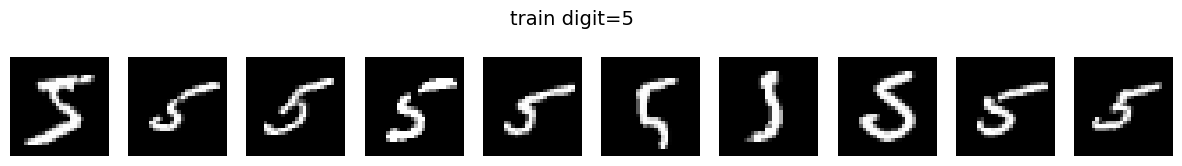

In [16]:
show_digit_row(digit=5, split="train", n=10)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mlp import MLP  # 直接相对导入
# === 加载模型权重 ===
MODEL_PATH = "mlp_model.npz"
mlp = MLP(input_size=784, hidden_size=8, output_size=10, learning_rate=0.1)
mlp.load_model(MODEL_PATH)  # 使用你训练时保存的文件

# === 批量前向（查看前8个样本的预测） ===
probs = mlp.forward(X_test[:8])                 # (8, 10)
preds = np.argmax(probs, axis=1)                # (8,)
print("preds:", preds.tolist())
print("gts  :", y_test[:8].tolist())


Model loaded from mlp_model.npz
preds: [7, 2, 1, 0, 4, 1, 4, 9]
gts  : [7, 2, 1, 0, 4, 1, 4, 9]


In [18]:
def show_pred_row(split="test", start=0, n=10):
    X, y = (X_test, y_test) if split == "test" else (X_train, y_train)
    Xb = X[start:start + n]
    preds = np.argmax(mlp.forward(Xb), axis=1)

    plt.figure(figsize=(n * 1.5, 2))
    for i in range(len(Xb)):
        plt.subplot(1, n, i + 1)
        plt.imshow(Xb[i].reshape(28, 28), cmap="gray")
        color = "green" if preds[i] == y[start + i] else "red"
        plt.title(f"{int(preds[i])}", color=color, fontsize=12)
        plt.axis("off")
    plt.suptitle(f"{split} samples {start}-{start + n - 1}", fontsize=14)
    plt.show()

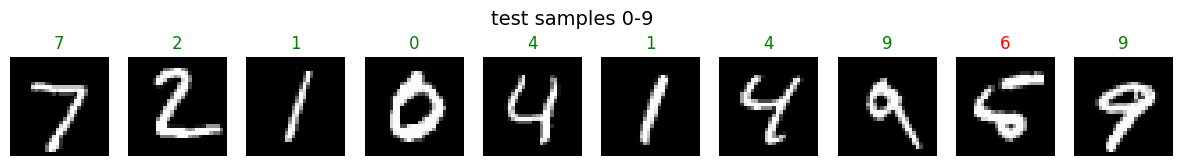

In [21]:
show_pred_row(split="test", start=0, n=10)

In [22]:
train_acc = mlp.evaluate(X_train, y_train)
test_acc  = mlp.evaluate(X_test, y_test)
print(f"Train accuracy: {train_acc:.4f}")
print(f"Test  accuracy: {test_acc:.4f}")

Train accuracy: 0.9095
Test  accuracy: 0.9080
